## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## Import Dataset 

In [2]:
data_bank = pd.read_csv('bank-full.csv', delimiter=';' )
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [3]:
data_bank.shape

(45211, 17)

In [4]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data_bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [6]:
data_bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [7]:
data_bank.month.value_counts().sort_values()

dec      214
mar      477
sep      579
oct      738
jan     1403
feb     2649
apr     2932
nov     3970
jun     5341
aug     6247
jul     6895
may    13766
Name: month, dtype: int64

In [8]:
data_bank.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [9]:
data_bank.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [10]:
data_bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## Separate the numerical & categorical columns

#### Numerical columns

In [11]:
data_num = data_bank[['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'duration']]
data_num

,age,balance,day,campaign,pdays,previous,duration
0,58,2143,5,1,-1,0,261
1,44,29,5,1,-1,0,151
2,33,2,5,1,-1,0,76
3,47,1506,5,1,-1,0,92
4,33,1,5,1,-1,0,198
...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,977
45207,71,1729,17,2,-1,0,456
45208,72,5715,17,5,184,3,1127
45209,57,668,17,4,-1,0,508


In [12]:
# dropping duration because we don't now it at the beginning how much will be the duration of call.
del data_num['duration']

In [13]:
data_cat = pd.concat([data_bank.iloc[:, 1:5], data_bank.iloc[:, 6:9], data_bank.iloc[:, -7], data_bank.iloc[:, -2]], axis=1)
data_cat

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


## Encoding of categrical variables

In [14]:
data1 = pd.get_dummies(data_cat, columns=['job', 'marital', 'education','contact', 'poutcome', 'month'], drop_first=True)
data1

,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,no,yes,no,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,no,yes,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,no,yes,yes,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,no,yes,no,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,no,no,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,no,no,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,no,no,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,no,no,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,no,no,no,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# Custom Binary Encoding of classification variables into Binary variables 
data1['default'] = np.where(data1['default'].str.contains('yes'), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains('yes'), 1, 0)
data1['loan']    = np.where(data1['loan'].str.contains('yes'), 1, 0)
data1['y']       = np.where(data_bank['y'].str.contains('yes'), 1, 0)    
data1

,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
45208,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
45209,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   default              45211 non-null  int32
 1   housing              45211 non-null  int32
 2   loan                 45211 non-null  int32
 3   job_blue-collar      45211 non-null  uint8
 4   job_entrepreneur     45211 non-null  uint8
 5   job_housemaid        45211 non-null  uint8
 6   job_management       45211 non-null  uint8
 7   job_retired          45211 non-null  uint8
 8   job_self-employed    45211 non-null  uint8
 9   job_services         45211 non-null  uint8
 10  job_student          45211 non-null  uint8
 11  job_technician       45211 non-null  uint8
 12  job_unemployed       45211 non-null  uint8
 13  job_unknown          45211 non-null  uint8
 14  marital_married      45211 non-null  uint8
 15  marital_single       45211 non-null  uint8
 16  education_secondary  4

In [17]:
data = pd.concat([data_num, data1], axis=1)
data

,age,balance,day,campaign,pdays,previous,default,housing,loan,job_blue-collar,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,44,29,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,2,5,1,-1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,47,1506,5,1,-1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,1729,17,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45208,72,5715,17,5,184,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45209,57,668,17,4,-1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Splitting the Dataset

In [18]:
X = pd.concat([data.iloc[:, :-1]], axis=1)
y = data.iloc[:, -1]

In [19]:
X

,age,balance,day,campaign,pdays,previous,default,housing,loan,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,1,-1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,1,-1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,5,184,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,4,-1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

## Model Building

In [21]:
lr = LogisticRegression()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.25)

In [24]:
X_train.shape, X_test.shape

((33908, 41), (11303, 41))

In [25]:
y_train.shape, y_test.shape

((33908,), (11303,))

## Model Training & Evaluation

In [26]:
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
lr.coef_

array([[-4.61490318e-03,  2.08941070e-05,  2.70395684e-04,
        -2.04034540e-01,  1.93056135e-03, -1.14822305e-01,
        -1.99832846e-02, -7.13057756e-01, -2.28157375e-01,
        -2.64785289e-01, -2.80331640e-02, -1.45622898e-02,
         3.12062098e-02,  1.83499261e-01, -9.56699698e-03,
        -9.56204991e-02,  4.73932420e-02, -6.39498695e-02,
         5.79057043e-03,  2.15996505e-03, -2.35933338e-01,
        -2.11187760e-02, -2.69873561e-01,  1.03433778e-01,
         1.57402003e-02,  4.01306268e-02, -4.98582065e-01,
        -3.22607967e-02,  3.95591482e-01, -4.17667334e-01,
         2.98307901e-02,  3.80994257e-02, -8.69026636e-03,
        -2.16643582e-02, -5.04917955e-02, -6.24766100e-02,
         1.01312662e-01, -4.60748064e-01, -8.13291377e-02,
         1.18848100e-01,  9.62231091e-02]])

In [28]:
lr.intercept_

array([-0.23538001])

In [29]:
y_pred_train = lr.predict(X_train)

In [30]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     29928
           1       0.70      0.02      0.04      3980

    accuracy                           0.88     33908
   macro avg       0.79      0.51      0.49     33908
weighted avg       0.86      0.88      0.83     33908



In [31]:
confusion_matrix(y_train, y_pred_train)

array([[29892,    36],
       [ 3896,    84]], dtype=int64)

In [32]:
accuracy_score(y_train, y_pred_train)

0.8840391647988676

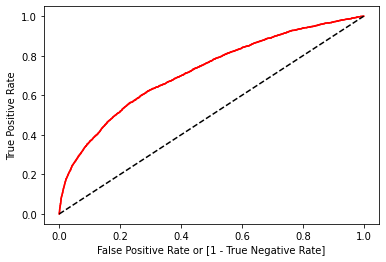

auc accuracy: 0.51


In [33]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_train,lr.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_train,y_pred_train)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc.round(2))

## Model Testing & Evaluation 

In [34]:
y_pred = lr.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9994
           1       0.60      0.01      0.03      1309

    accuracy                           0.88     11303
   macro avg       0.74      0.51      0.48     11303
weighted avg       0.85      0.88      0.83     11303



In [36]:
confusion_matrix(y_test, y_pred)

array([[9982,   12],
       [1291,   18]], dtype=int64)

In [37]:
print("Accuracy score: ", accuracy_score(y_test, y_pred).round(2))

Accuracy score:  0.88


## ROC curve & AUC score

In [38]:
# As accuracy = 0.8933, which is greater than 0.5. Threshold value>0.5=1 else, Threshold value<0.5=0 
lr.predict_proba(X_test)[:,1] 

array([0.0219762 , 0.27143888, 0.06950104, ..., 0.1625722 , 0.24422859,
       0.00104007])

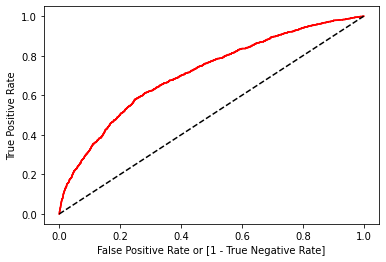

auc accuracy: 0.51


In [39]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc.round(2))

## The accuracy score for our model is 88% for test data.

### =================================================================